In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sampling.hmc_sampling import *
from models.regression_model import RegressionModel
from models.ld_regression_model import LDRegressionModel

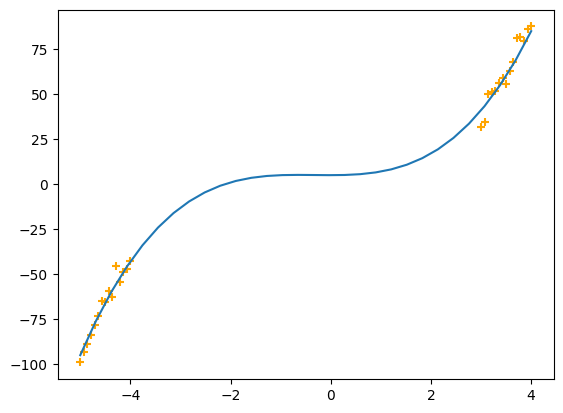

In [2]:
# training data generation
sigma = 5
f = lambda x : x**3 + x**2 + 5
x_test = np.linspace(-5, 4, 30)
y_test = f(x_test)
x_train = np.concatenate((np.linspace(-5, -4, 15), np.linspace(3,4,15)))
y_train = f(x_train) + np.random.normal(0, sigma, len(x_train))
plt.scatter(x_train, y_train, marker='+', color='Orange')
plt.plot(x_test, y_test)
plt.show()

# dimensions of output from basis function
d_dash = 4

# phi function for LR
def phi(x):
	return np.array([1, x, x**2, x**3], dtype=object)

In [3]:
b = 1/sigma**2
var_prior = 3
A = np.linalg.inv(np.diag(np.full(d_dash, var_prior)))
model = LDRegressionModel(x_train, y_train, np.full(len(x_train), b), A, phi)
sampler = HMCsampler(0.1, model, M=np.diag(np.full(d_dash, 100))) # mass matrix needs to be very high for this to work, unsure why

In [4]:
accept, samples = sampler.sample(100, int_samples=1000)

100%|██████████| 100/100 [00:04<00:00, 24.26it/s]


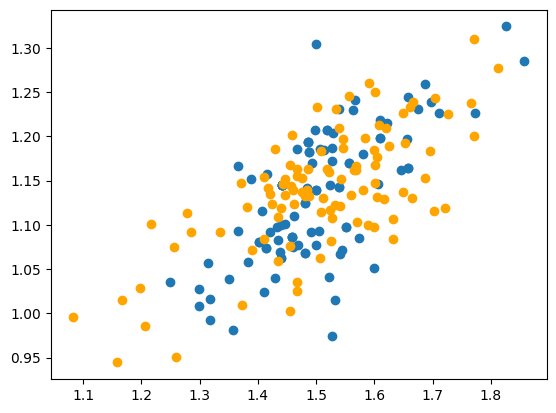

In [5]:
test_samples = np.random.multivariate_normal(model.mean, model.Hinv, size=100)
i = 2
j = 3
plt.scatter(samples[:,i], samples[:,j])
plt.scatter(test_samples[:,i], test_samples[:,j], c='Orange')

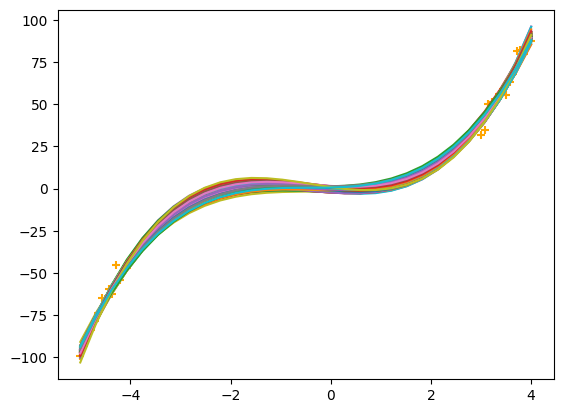

In [6]:
for s in samples:	
	plt.plot(x_test, s @ phi(x_test))
plt.scatter(x_train, y_train, marker='+', color='Orange')

In [7]:
print(accept)

0.79
